In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common
import importlib
importlib.reload(common)

<module 'common.common' from '/Users/suyeetan/Downloads/CS5344_Project/work/common/common.py'>

In [2]:
%run ../datasets/heart.ipynb

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [3]:
all_df, main_labels, config = get_heart_df()

Normal class:  0    0
Name: num, dtype: int64


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
all_df.shape

(920, 16)

In [6]:
all_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 2. Data Cleaning Check
* Check for null/missing values
* Check for wrong values
* Drop unnecessary columns

In [7]:
all_df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

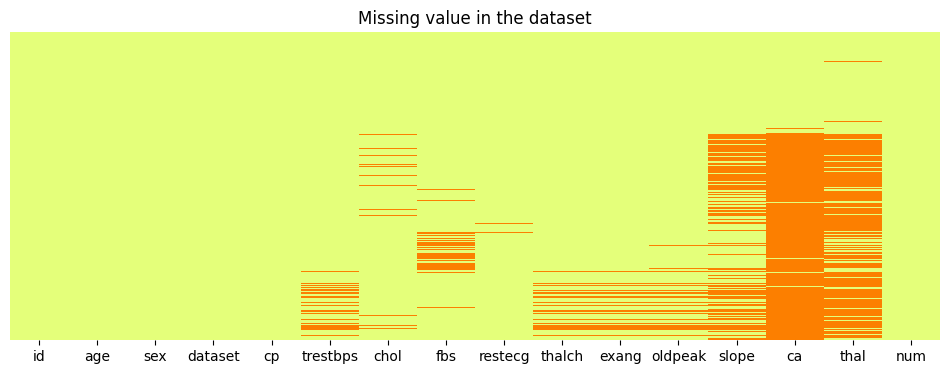

In [8]:
common.show_missing_values(all_df)

In [9]:
for col in all_df.columns:
    print(all_df[col].value_counts())
    print("--------------------------------")

id
1      1
605    1
607    1
608    1
609    1
      ..
311    1
312    1
313    1
314    1
920    1
Name: count, Length: 920, dtype: int64
--------------------------------
age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64
--------------------------------
sex
Male      726
Female    194
Name: count, dtype: int64
--------------------------------
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
--------------------------------
cp
asymptomatic       496
non-anginal        204
atypical angina    174

In [11]:
all_df = all_df.drop(['id','dataset'], axis=1)

In [12]:
median_chol = all_df.loc[all_df['chol']!=0, 'chol'].median()
all_df = all_df.fillna(value={'chol': median_chol})
all_df.loc[all_df['chol']==0, 'chol'] = median_chol 

mean_bp = all_df.loc[all_df['trestbps']!=0,'trestbps'].mean()
all_df = all_df.fillna(value={'trestbps': mean_bp})
all_df.loc[all_df['trestbps']==0, 'trestbps'] = mean_bp

mean_hr = all_df.loc[all_df['thalch']!=0,'thalch'].mean()
all_df = all_df.fillna(value={'thalch': mean_hr})
all_df.loc[all_df['thalch']==0, 'thalch'] = mean_hr

mean_peak = all_df.oldpeak.mean()
all_df = all_df.fillna(value={'oldpeak': mean_peak})
all_df.loc[all_df['oldpeak']==0, 'oldpeak'] = mean_peak

all_df.drop(labels=['ca','thal','slope'], axis=1, inplace=True)
all_df = all_df.astype({'sex':'category', 'cp':'category', 'fbs':'bool', 'restecg':'category', 'exang':'bool'})
all_df.dropna(inplace=True)

## 3. Summary Statistics
* Mean, median, min, max, percentiles
* Understand data distribution for numerical features
* Check for outliers

In [13]:
all_df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.530501,132.296474,245.174837,137.529424,1.233723,0.995643
std,9.412783,17.929500,51.815336,25.159970,0.821365,1.143939
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,217.250000,120.000000,0.878788,0.000000
50%,54.000000,130.000000,239.500000,138.000000,0.878788,1.000000
75%,60.000000,140.000000,266.750000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


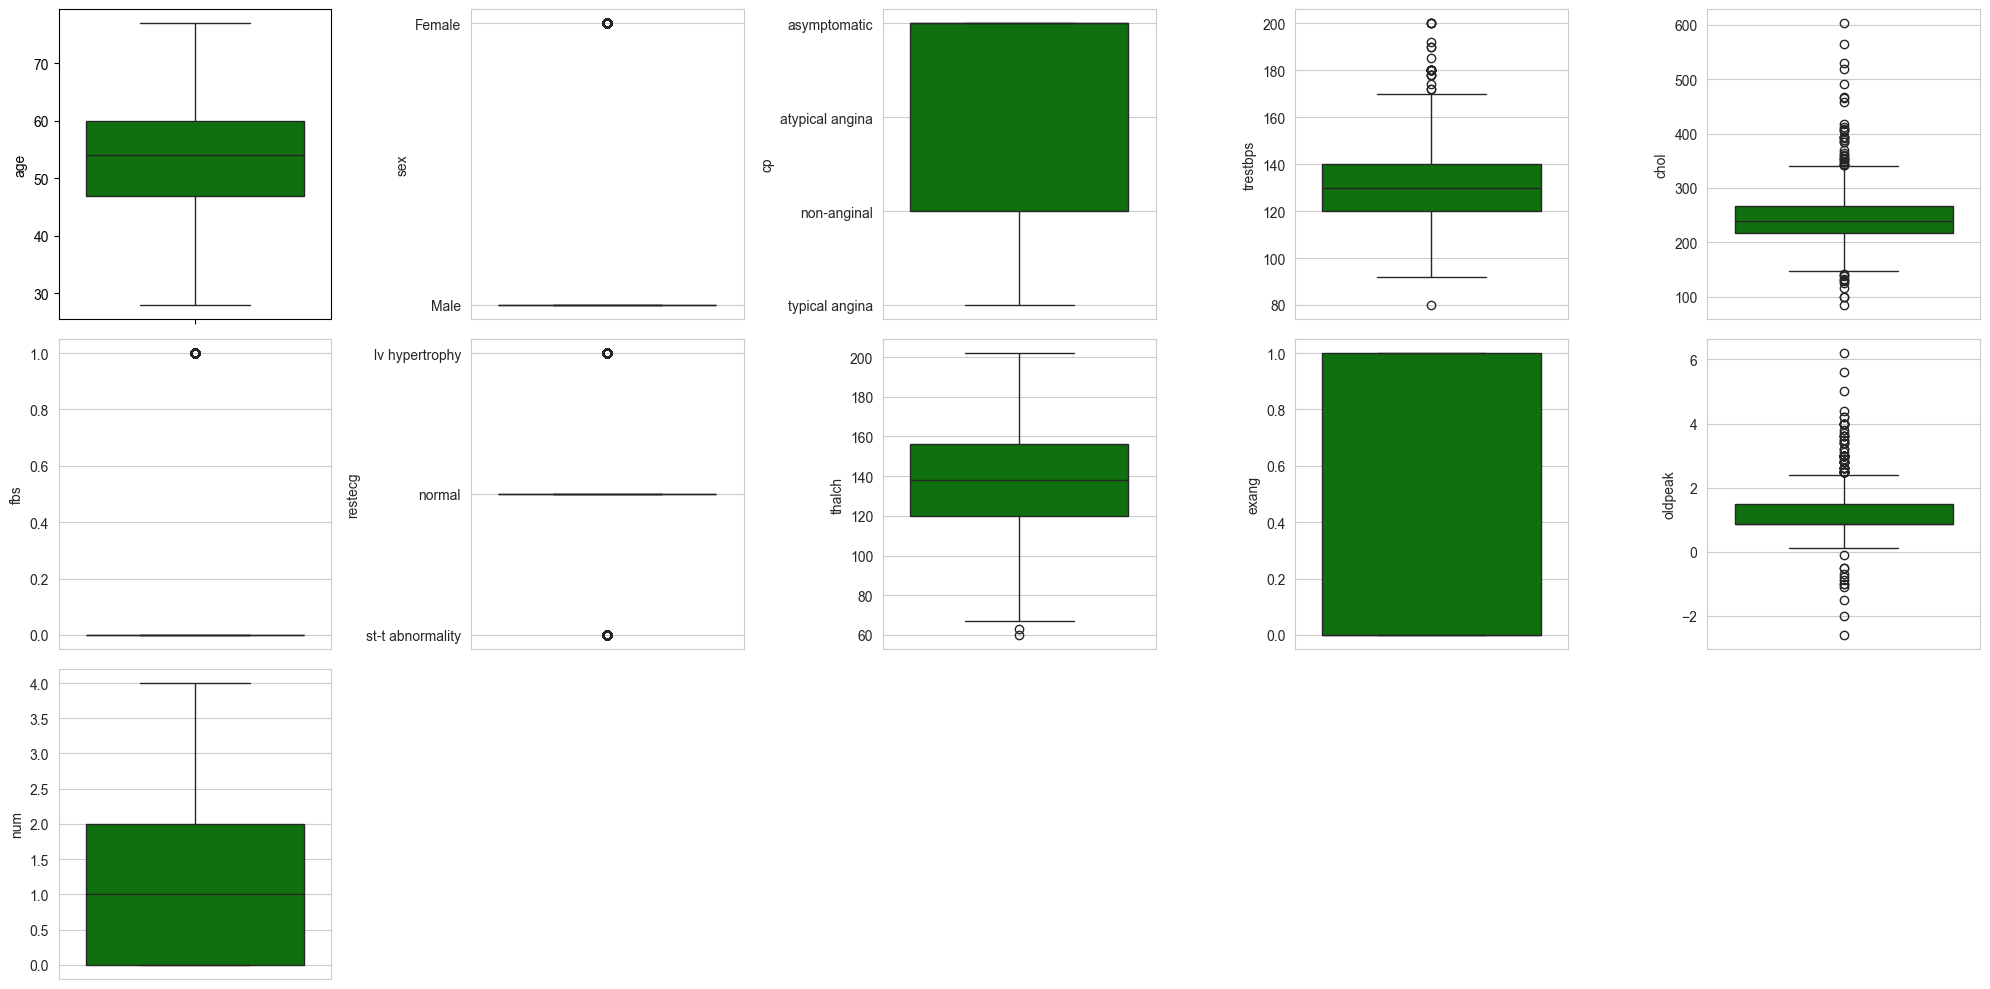

In [15]:
common.show_boxplots(all_df)

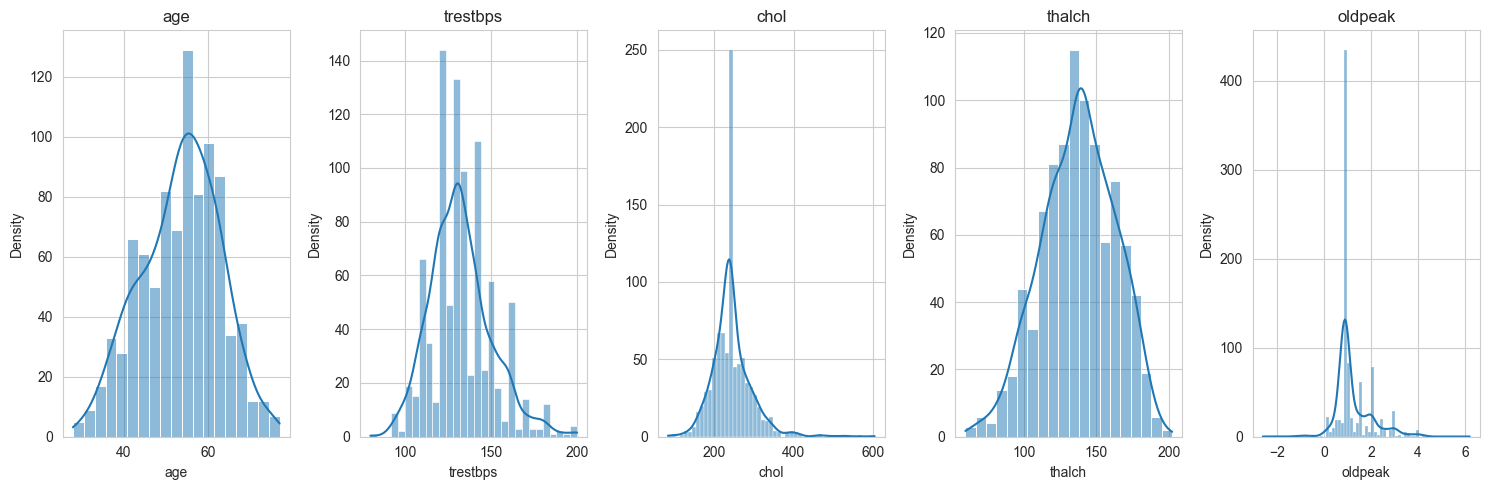

In [17]:
columns_to_plot_distribution = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
num_df = all_df.loc[:, columns_to_plot_distribution]
common.show_distribution_graph(num_df, columns_to_plot_distribution)

## 4. Univariate Analysis (Single Variable)
* Categorical variables:
    * Frequency distribution
    * Bar plots or pie charts.
* Numerical variables:
    * Histograms or box plots.
    * Distribution plots

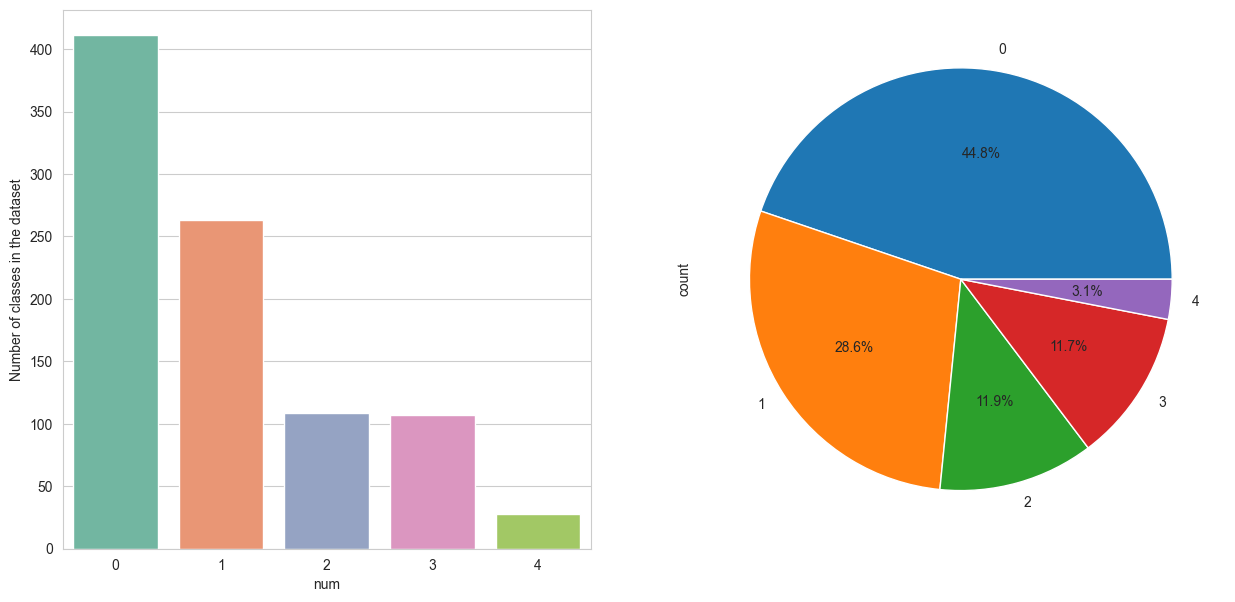

In [18]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

## 5. Bivariate/Multivariate Analysis
* Correlation matrix (for numerical variables)
* Scatter plots (to assess relationships between two numerical variables)
* Pair plots (to visualize relationships across multiple variables)
* Group-wise statistics (e.g., groupby() for summarizing data by category)

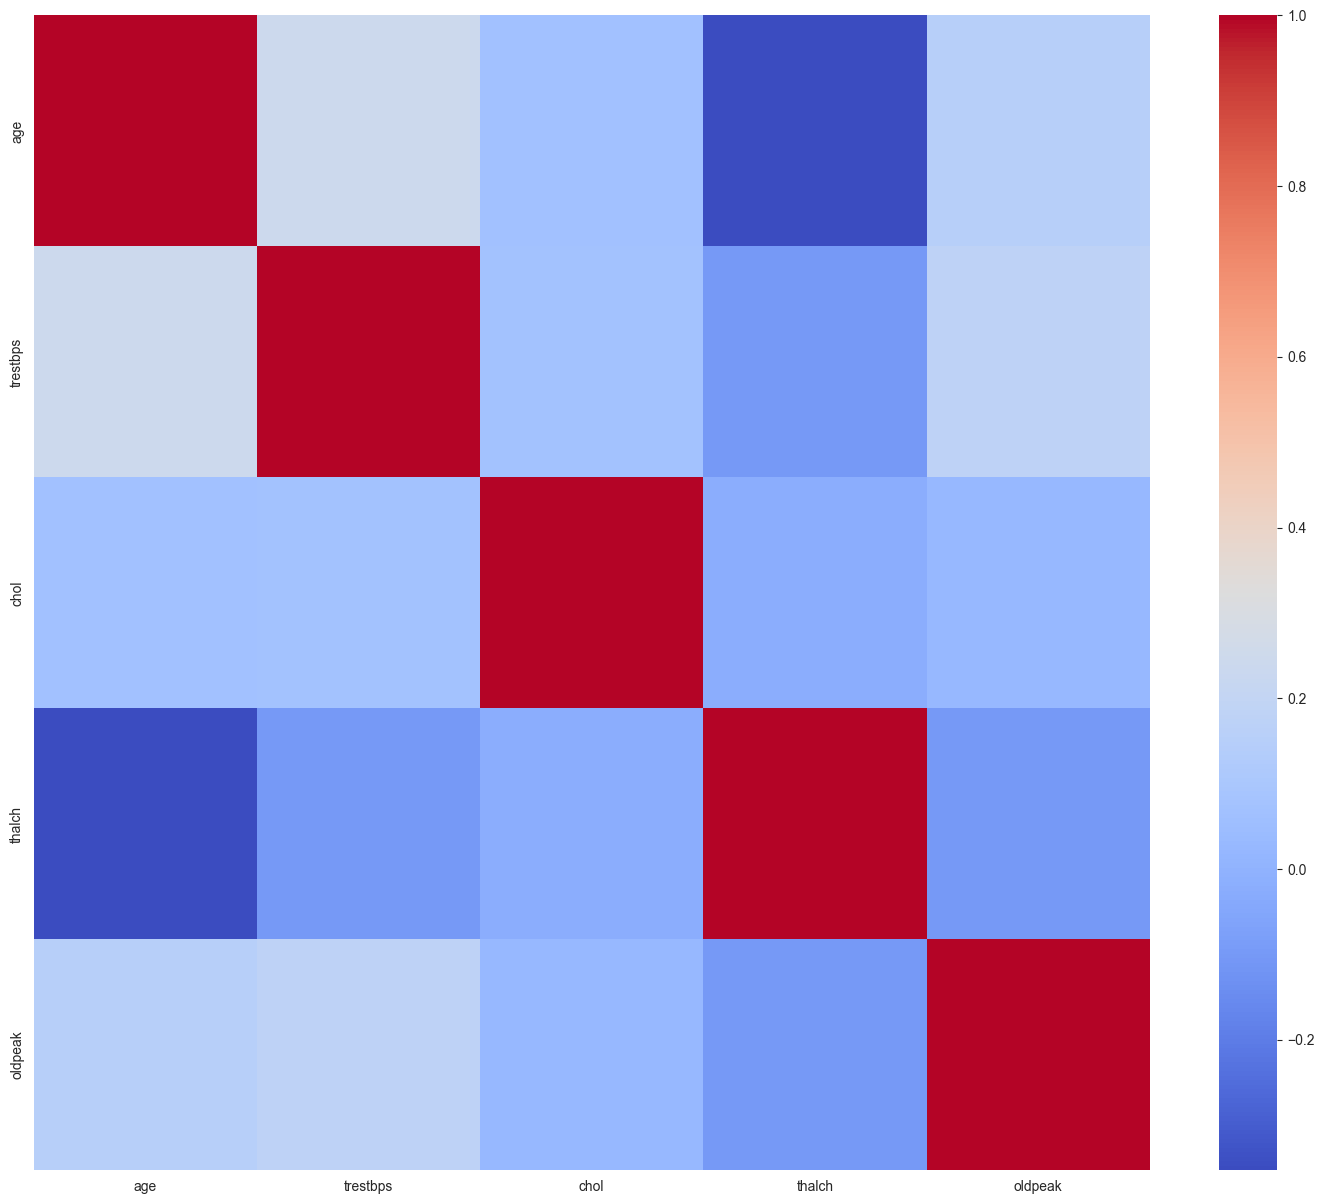

In [19]:
common.show_feature_correlation(num_df)